# Lollipop chart - wykres ilości osób zmarłych

Dane o ilości osób zmarłych - pierwszy wiersz dla roku 2019 i 2020 z ramki danych: *Zgony według tygodni* - źródło: GUS


Dane o ilości osób zmarłych na COVID-19: *COVID-19 w Polsce - zbiór danych stworzony przez Michała Rogalskiego* ; pod uwagę została wzięta ramka danych trzymająca zsumowaną ilość przypadków śmiertelnych dla każdego z województw


Dane od 28.09 do 01.11


Dane do wykresu na podstawie powyższych ramek danych

In [1]:
import numpy as np
import pandas as pd

df1 = pd.read_csv("data/preprocessed/lollipop_chart.csv", sep=",")
df1 = df1.drop('Unnamed: 0', 1)
df1['rok_2020_bez_covida'] = df1.rok_2020 - df1.rok_2020_covid_zgony
df1.head()

## Wykres

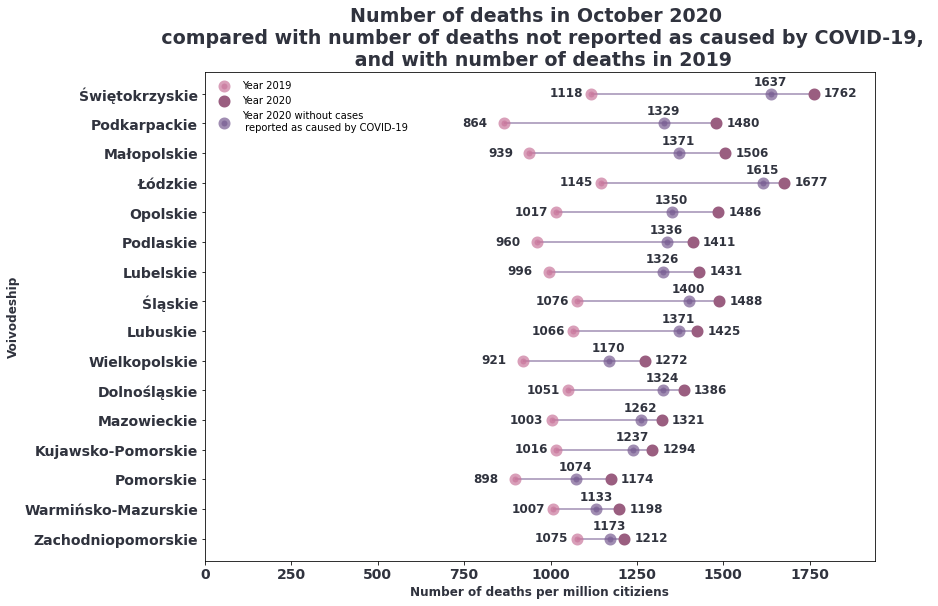

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 9] # ustawienia wielkości wykresu

rok2020 = df1.rok_2020 / df1.ilosc_mieszkancow_2020 *10**6
rok2019 = df1.rok_2019 / df1.ilosc_mieszkancow_2019 *10**6
rok2020_bez_covida = df1.rok_2020_bez_covida / df1.ilosc_mieszkancow_2020 *10**6

roznica = rok2020 - rok2019

df = pd.DataFrame({'wojewodztwo': df1.wojewodztwo, 
                   'rok2020': rok2020, 
                   'rok2020_bez_covida' : rok2020_bez_covida,
                   'rok2019': rok2019, 
                   'roznica': roznica})

ordered_df = df.sort_values(by = 'roznica') # sortujemy wg. województw, które miały największą zmianę w ilości zgonów
my_range = range(1,len(df.wojewodztwo)+1)

plt.hlines(y=my_range, xmin=ordered_df['rok2019'], 
           xmax=ordered_df['rok2020'], color='#785d92', alpha=0.7, zorder=5)
plt.scatter(ordered_df['rok2019'], my_range, 
            color='#c9779c', alpha=0.7 , label='Year 2019',
           linewidths = 6, zorder=8)
plt.scatter(ordered_df['rok2020'], my_range, 
            color='#9a5e80', alpha=1, label='Year 2020',
           linewidths = 6, zorder=8)
plt.scatter(ordered_df['rok2020_bez_covida'], my_range, 
            color='#785d92', alpha=0.7 , label='Year 2020 without cases \n reported as caused by COVID-19',
           linewidths = 6, zorder=8)

l = plt.legend()
for text in l.get_texts():
    text.set_color("#30333e")
plt.legend(framealpha = 0)

# Poprawki wizualne
plt.title("Number of deaths in October 2020 \n  compared with number of deaths not reported as caused by COVID-19, \n and with number of deaths in 2019", 
          loc='center', fontsize = 19, fontweight="bold", color = "#30333e")
plt.yticks(my_range, ordered_df['wojewodztwo'], fontsize = 14, fontweight="bold", color = "#30333e")
plt.xticks(fontsize = 14, fontweight="bold", color = "#30333e")

plt.xlabel('Number of deaths per million citiziens', fontsize = 12, fontweight="bold", color = "#30333e") # Wypada nazwać, co prezentujemy :)
plt.ylabel('Voivodeship', fontsize = 12, fontweight="bold", color = "#30333e")

plt.xlim(0, 1.1 * max(max(df['rok2020']), max(df['rok2019'])))

# I jeszcze podpisanie wartości - żeby możnabyło je dobrze zobaczyć
i = 1
for row in ordered_df.itertuples():
    plt.annotate(str(round(row.rok2020)), (row.rok2020 + 30, i - 0.1), fontsize = 12, fontweight="bold", color = "#30333e")
    plt.annotate(str(round(row.rok2019)), (row.rok2019 - 120, i - 0.1), fontsize = 12, fontweight="bold", color = "#30333e")
    plt.annotate(str(round(row.rok2020_bez_covida)), (row.rok2020_bez_covida - 50, i + 0.3), fontsize = 12, fontweight="bold", color = "#30333e")
    i = i + 1

plt.savefig('charts/lollipop_chart.png', bbox_inches = 'tight', transparent=True)

plt.show()